# Compositional Learning for Synchronous Parallel Automata (SCL* Algorithm)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, kstest, shapiro, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
f = open("Configs/States.txt", "r")
minNumOfStates = int (f.readline())
maxNumOfStates = int(f.readline())

In [3]:
realTestsDf =  pd.read_csv('Results/Parameters/Real Tests/Results.csv',index_col=False)
p2pTestsDf = pd.read_csv('Results/Parameters/Generated Tests/Point-To-Point/Results.csv', index_col=False)
ringTestsDf = pd.read_csv('Results/Parameters/Generated Tests/Ring/Results.csv', index_col=False)
starTestsDf = pd.read_csv('Results/Parameters/Generated Tests/Star/Results.csv', index_col=False)
meshTestsDf = pd.read_csv('Results/Parameters/Generated Tests/Mesh/Results.csv', index_col=False)
busTestsDf = pd.read_csv('Results/Parameters/Generated Tests/Bus/Results.csv', index_col=False)
bipartiteTestsDf = pd.read_csv('Results/Parameters/Generated Tests/Bipartite/Results.csv', index_col=False)

types = ['Real Tests', 'Point-To-Point Tests', 'Ring Tests', 'Star Tests', 'Mesh Tests', 'Bus Tests', 'Bipartite Tests']
allTests = {'Real Tests' : realTestsDf, 'Point-To-Point Tests' : p2pTestsDf, 'Ring Tests' : ringTestsDf,
            'Star Tests' : starTestsDf, 'Mesh Tests' : meshTestsDf, 'Bus Tests' : busTestsDf, 'Bipartite Tests' : bipartiteTestsDf}

In [4]:
oldRealTestsDf =  pd.read_csv('Final Plot Data/Parameters/Real Tests/Old.csv',index_col=False)
oldP2pTestsDf = pd.read_csv('Final Plot Data/Parameters/Generated Tests/Point-To-Point/Old.csv', index_col=False)
oldRingTestsDf = pd.read_csv('Final Plot Data/Parameters/Generated Tests/Ring/Old.csv', index_col=False)
oldStarTestsDf = pd.read_csv('Final Plot Data/Parameters/Generated Tests/Star/Old.csv', index_col=False)
oldMeshTestsDf = pd.read_csv('Final Plot Data/Parameters/Generated Tests/Mesh/Old.csv', index_col=False)

In [5]:
def assignAllTests(function, hasOneParam):
    for currentType in types:
        if hasOneParam:
            allTests[currentType] = function(allTests[currentType])
        else:
            allTests[currentType] = function(allTests[currentType], currentType)

## Clean data

In [6]:
def roundData(data):
  return round(data, 3)

In [7]:
def dropNas(data):
    data.dropna(axis=1, how='all')
    data.dropna()
    return(data)

In [8]:
assignAllTests(dropNas, True)

In [9]:
def selectTests(data, testType):
    print(testType + ":")
    for componentCounter in range(2, 10):
        currentSelected = data[data["CLSTAR_COMPONENTS"] == componentCounter]
        currentSelected = currentSelected[(currentSelected["STATES"] >= 100) & (currentSelected["STATES"] <= 30000)]
        print("\t For" + str(componentCounter) + " Components: " + str(len(currentSelected)) + ' Tests')
        if componentCounter == 2:
            selected = currentSelected
        else:
            selected = pd.concat([selected, currentSelected], ignore_index=True, sort=False)

    # selected = (
    #         selected
    #         .sort_values('CLSTAR_TOTAL_SYM')
    #         .drop_duplicates(
    #             subset=['CLSTAR_COMPONENTS', 'CLSTAR_TOTAL_SYM'],
    #             keep='first'
    #         )
    #         .copy()
    #     )
    return selected


In [10]:
assignAllTests(selectTests, False)

Real Tests:
	 For2 Components: 0 Tests
	 For3 Components: 21 Tests
	 For4 Components: 21 Tests
	 For5 Components: 21 Tests
	 For6 Components: 21 Tests
	 For7 Components: 21 Tests
	 For8 Components: 21 Tests
	 For9 Components: 21 Tests
Point-To-Point Tests:
	 For2 Components: 0 Tests
	 For3 Components: 30 Tests
	 For4 Components: 30 Tests
	 For5 Components: 30 Tests
	 For6 Components: 34 Tests
	 For7 Components: 34 Tests
	 For8 Components: 34 Tests
	 For9 Components: 30 Tests
Ring Tests:
	 For2 Components: 0 Tests
	 For3 Components: 30 Tests
	 For4 Components: 30 Tests
	 For5 Components: 30 Tests
	 For6 Components: 30 Tests
	 For7 Components: 30 Tests
	 For8 Components: 30 Tests
	 For9 Components: 29 Tests
Star Tests:
	 For2 Components: 0 Tests
	 For3 Components: 30 Tests
	 For4 Components: 30 Tests
	 For5 Components: 24 Tests
	 For6 Components: 18 Tests
	 For7 Components: 15 Tests
	 For8 Components: 11 Tests
	 For9 Components: 16 Tests
Mesh Tests:
	 For2 Components: 0 Tests
	 For3 Comp

In [11]:
# Calculate mean without outliers
from scipy import stats
def trimmedMean(x):
  z = stats.zscore(x)
  d_z = x.loc[z<3,]
  return d_z.mean()

## Statistical Analysis

We cluster the benchmark into eight categories based on the FSM’s number of states to summerize the results and illusterate them.

In [12]:
def doForAllTests(function, hasOneParam, param1 = None, param2 = None, param3 = None):
    for currentType in types:
        if hasOneParam:
            function(allTests[currentType])
        elif param1 == None:
            function(allTests[currentType], currentType)
        elif param2 == None:
            function(allTests[currentType], currentType, param1)
        elif param3 == None:
            function(allTests[currentType], currentType, param1, param2)
        else:
            function(allTests[currentType], currentType, param1, param2, param3)

In [13]:
# Data Distribution
def printDataInfo(data, testType):
    print("For " + testType + "Tests:")
    print("\tCount:  ",data['FILE_NAME'].unique().size)
    print("\tMin:    ",data.groupby('FILE_NAME').agg(min)['STATES'].min())
    print("\tMax:    ",data.groupby('FILE_NAME').agg(min)['STATES'].max())

    print("\tmean:   ", data.groupby('FILE_NAME').agg(min)['STATES'].mean())

    print("\tstd:    ", data.groupby('FILE_NAME').agg(min)['STATES'].std())

In [14]:
print(allTests)
doForAllTests(printDataInfo, False)

{'Real Tests':      Unnamed: 0.15  Unnamed: 0.14  Unnamed: 0.13  Unnamed: 0.12  \
0                0              0              0              3   
1                1              1              1              6   
2                2              2              2              2   
3                3              3              3              5   
4                4              4              4             14   
..             ...            ...            ...            ...   
142            142            142            142            142   
143            143            143            143            143   
144            144            144            144            145   
145            145            145            145            138   
146            146            146            146            140   

     Unnamed: 0.11  Unnamed: 0.10  Unnamed: 0.9  Unnamed: 0.8  Unnamed: 0.7  \
0              202            202           202           202           202   
1              196    

C:\Users\Aryan\AppData\Local\Temp/ipykernel_23832/2789857924.py:5: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("\tMin:    ",data.groupby('FILE_NAME').agg(min)['STATES'].min())
C:\Users\Aryan\AppData\Local\Temp/ipykernel_23832/2789857924.py:6: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("\tMax:    ",data.groupby('FILE_NAME').agg(min)['STATES'].max())
C:\Users\Aryan\AppData\Local\Temp/ipykernel_23832/2789857924.py:8: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep

In [15]:
def calculateProgress(data):
    data['CLSTAR_TOTAL_RST_progress'] = (1 - (data['CLSTAR_TOTAL_RST'] / data['CLSTAR_TOTAL_RST']))*100
    data['CLSTAR_TOTAL_SYM_progress'] = (1 - (data['CLSTAR_TOTAL_SYM'] / data['CLSTAR_TOTAL_SYM']))*100

    data['CLSTAR_MQ_SYM_progress'] = (1 - (data['CLSTAR_MQ_SYM'] / data['CLSTAR_MQ_SYM']))*100
    data['CLSTAR_MQ_RST_progress'] = (1 - (data['CLSTAR_MQ_RST'] / data['CLSTAR_MQ_RST']))*100
    data['CLSTAR_EQ_SYM_progress'] = (1 - (data['CLSTAR_EQ_SYM'] / data['CLSTAR_EQ_SYM']))*100
    data['CLSTAR_EQ_RST_progress'] = (1 - (data['CLSTAR_EQ_RST'] / data['CLSTAR_EQ_RST']))*100
    
    return(data)


In [16]:
doForAllTests(calculateProgress, True)

# Plots

In [17]:
sns.set(rc={'figure.figsize':(15,6)})

In [18]:
def addTypeColumn(data, type):
    data["TYPE"] = type
    return data

In [19]:
doForAllTests(addTypeColumn, False)

In [20]:
# def plotSingleTypeData(data, testType, yCol1, yCol2, yLabel):
#     # filtered_df = (
#     #     data
#     #     .sort_values('CLSTAR_TOTAL_SYM')
#     #     .drop_duplicates(
#     #         subset=['CLSTAR_COMPONENTS', 'CLSTAR_TOTAL_SYM'],
#     #         keep='first'
#     #     )
#     #     .copy()
#     # )


#     # filtered_df = filtered_df.assign(
#     #     diff = filtered_df['LSTAR_TOTAL_SYM'] - filtered_df['CLSTAR_TOTAL_SYM']
#     # )

#     # filtered_df['score'] = filtered_df['diff']

#     # result = (
#     # filtered_df
#     # .sort_values(['CLSTAR_COMPONENTS', 'score'], ascending=[True, True])
#     # .groupby('CLSTAR_COMPONENTS', as_index=False)
#     # .head(100)
#     # )


#     # result = data[10 * data['LSTAR_TOTAL_SYM'] >= data['CLSTAR_TOTAL_SYM']]

#     # result = (
#     # data
#     # .groupby('CLSTAR_COMPONENTS', as_index=False)
#     # .head(37)
#     # )

#     d2 = data[['STATES', 'CLSTAR_COMPONENTS', yCol1, yCol2]]
    
#     d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']] 
#     d2 = d2.set_index(['#states', '#components'])
    
#     d2 = d2[['L*', 'SCL*']].stack().reset_index()
#     d2 = d2.rename(columns={"level_2": "method", 0: yLabel})
    
#     g = sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=[yLabel],
#                      hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g'])
#     # g.fig.suptitle(testType, y=1.08)
#     delta = int((maxNumOfStates - minNumOfStates + int(maxNumOfStates / 300)) / 60)
#     g.axes[0, 0].set_xlim((minNumOfStates - delta, maxNumOfStates + delta))
    
#     # Set x-axis to display only integer values
#     g.axes[0, 1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

#     plt.yscale('log')
#     if testType == 'Real Tests':
#         if yLabel == "Total Number of Input Symbols":
#             plt.savefig("Results/Plots/Symbols.png")
#             g._figure.savefig(
#                 "Results/Plots/Real-Symbols.pdf",
#                 format="pdf",
#                 bbox_inches="tight"
#             )

#         else:
#             plt.savefig("Results/Plots/Resets.png")
#             g._figure.savefig(
#                 "Results/Plots/Real-Resets.pdf",
#                 format="pdf",
#                 bbox_inches="tight"
#             )


In [21]:
def plotSingleTypeData(
    data,
    testType,
    yCol1,
    yCol2=None,
    yLabel=None,
    data2=None,
    method_names=("L*", "ESCL*")
):
    dfs = []

    d1 = data[['STATES', 'CLSTAR_COMPONENTS', yCol1]].copy()
    d1['method'] = method_names[0]
    d1[yLabel] = d1[yCol1]
    d1['#states'] = d1['STATES']
    d1['#components'] = d1['CLSTAR_COMPONENTS']
    dfs.append(d1[['#states', '#components', 'method', yLabel]])

    if data2 is None:
        d2 = data[['STATES', 'CLSTAR_COMPONENTS', yCol2]].copy()
        d2[yLabel] = d2[yCol2]
    else:
        d2 = data2[['STATES', 'CLSTAR_COMPONENTS', yCol1]].copy()
        d2[yLabel] = d2[yCol1]

    d2['method'] = method_names[1]
    d2['#states'] = d2['STATES']
    d2['#components'] = d2['CLSTAR_COMPONENTS']
    dfs.append(d2[['#states', '#components', 'method', yLabel]])

    d_final = pd.concat(dfs, ignore_index=True)

    g = sns.pairplot(
        d_final,
        x_vars=["#states", "#components"],
        y_vars=[yLabel],
        hue="method",
        height=5,
        aspect=1.2,
        kind="reg",
        palette=['r', 'g']
    )

    delta = int((maxNumOfStates - minNumOfStates + int(maxNumOfStates / 300)) / 60)
    g.axes[0, 0].set_xlim((minNumOfStates - delta, maxNumOfStates + delta))
    g.axes[0, 1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.yscale('log')
    
    if testType == 'Real Tests':
        if yLabel == "Total Number of Input Symbols":
            plt.savefig("Results/Plots/Symbols.png")
            g._figure.savefig(
                "Results/Plots/Real-Symbols.pdf",
                format="pdf",
                bbox_inches="tight"
            )

        else:
            plt.savefig("Results/Plots/Resets.png")
            g._figure.savefig(
                "Results/Plots/Real-Resets.pdf",
                format="pdf",
                bbox_inches="tight"
            )

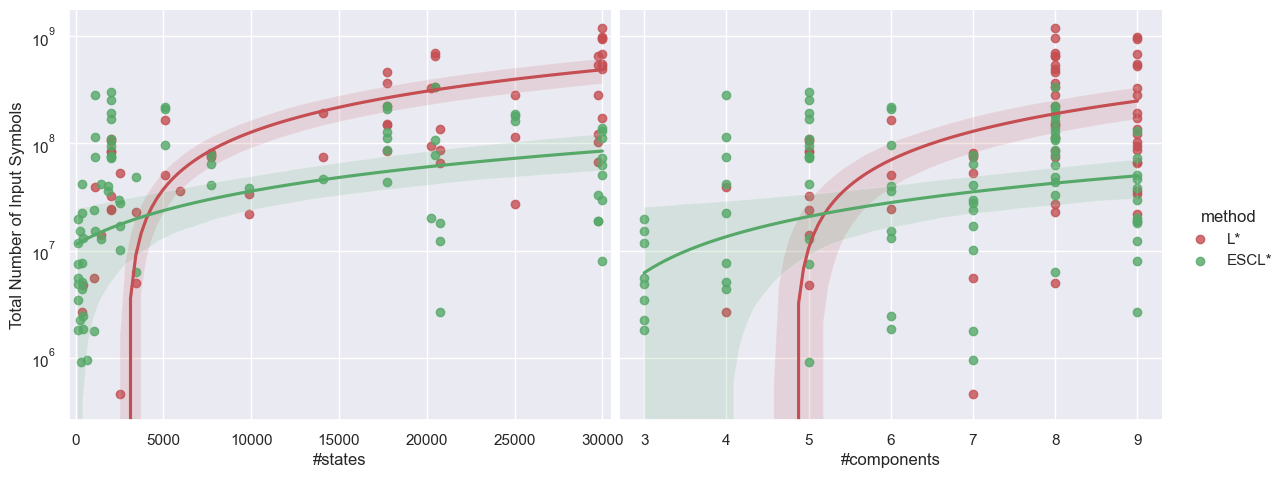

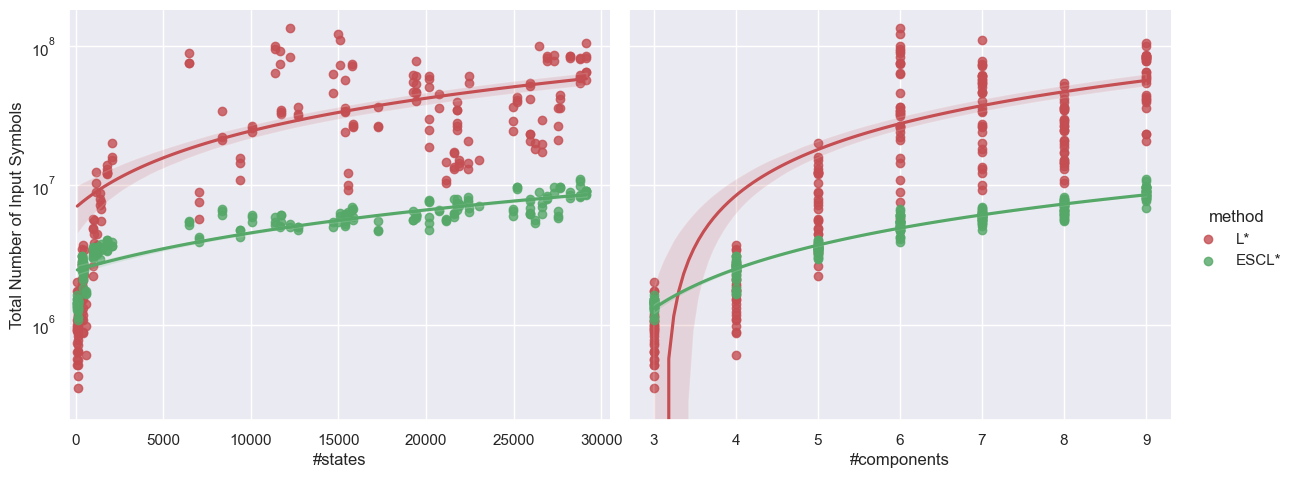

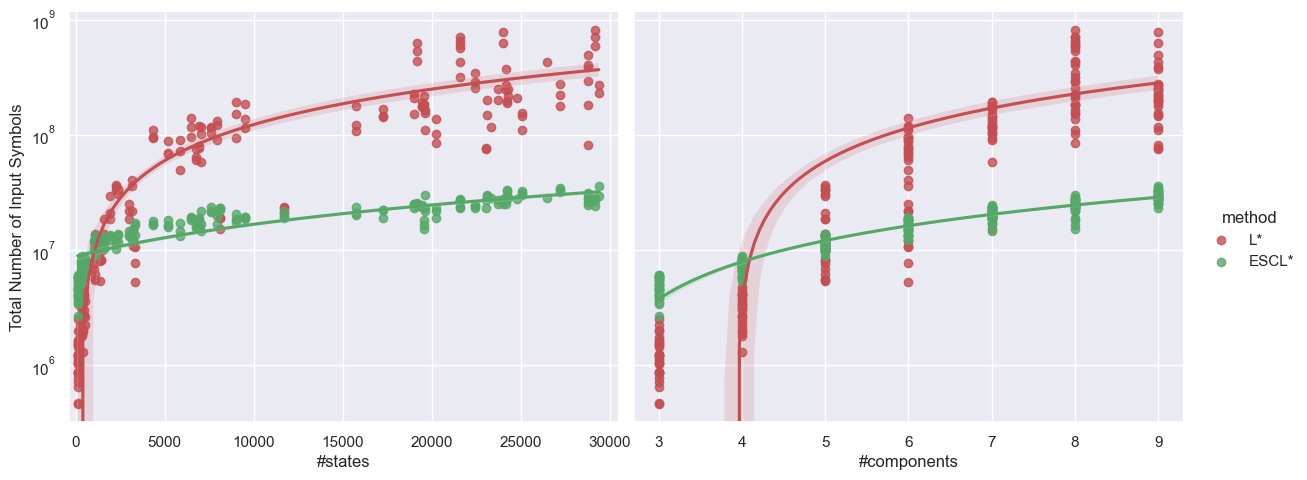

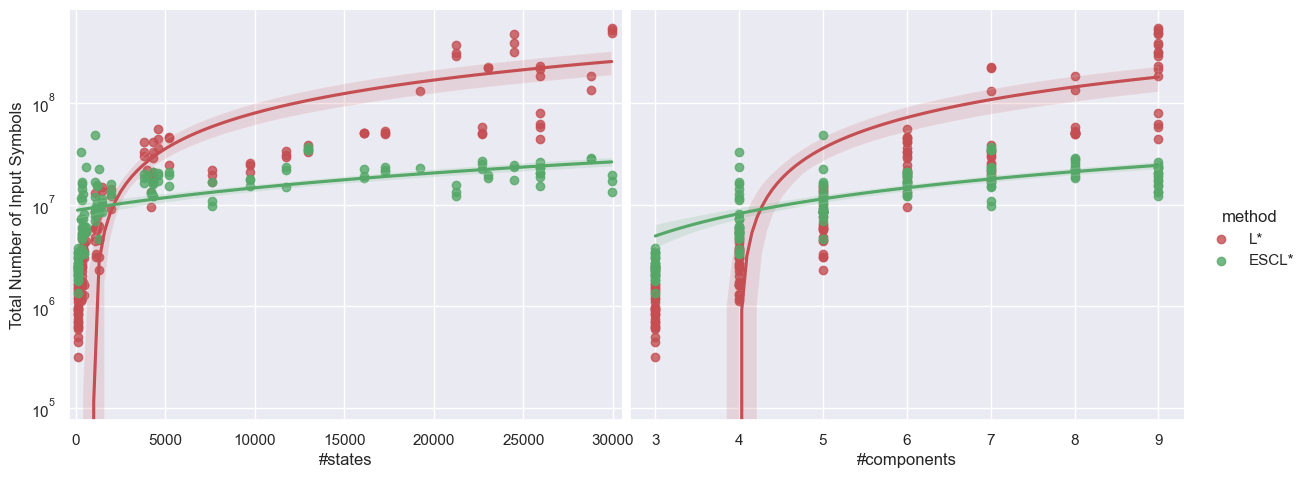

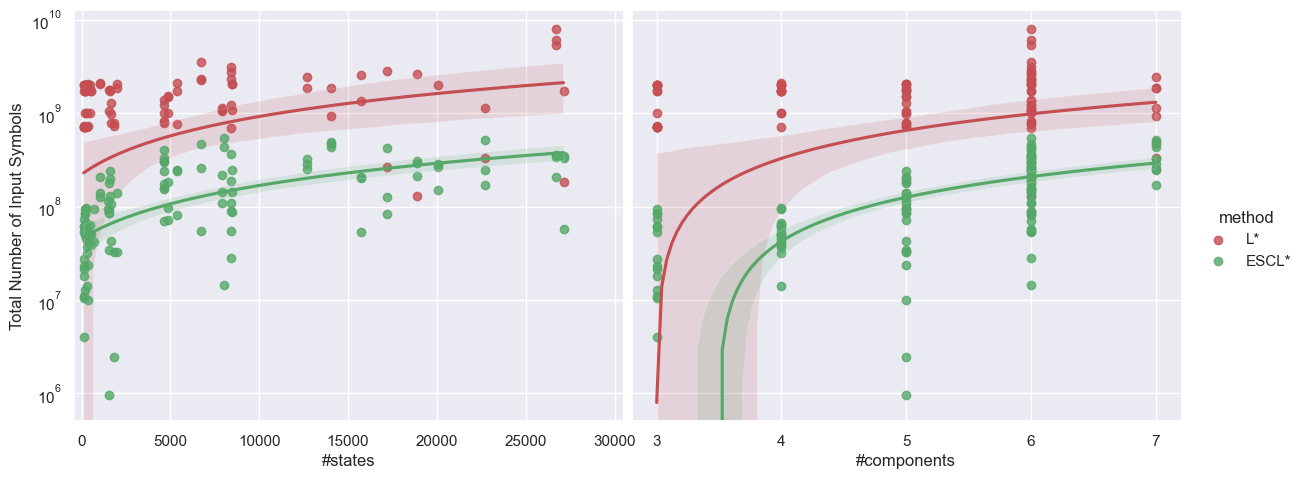

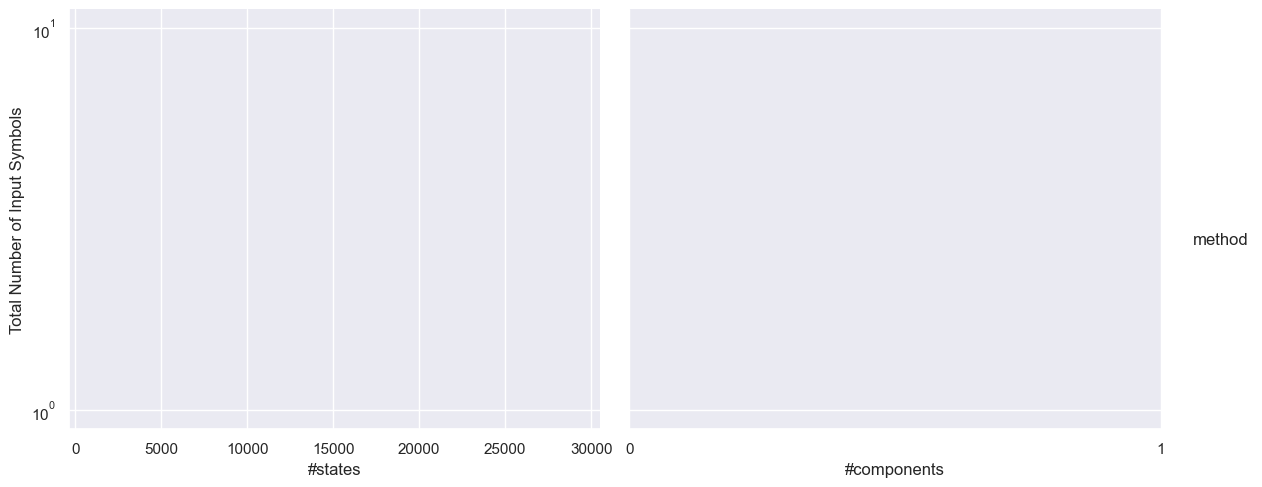

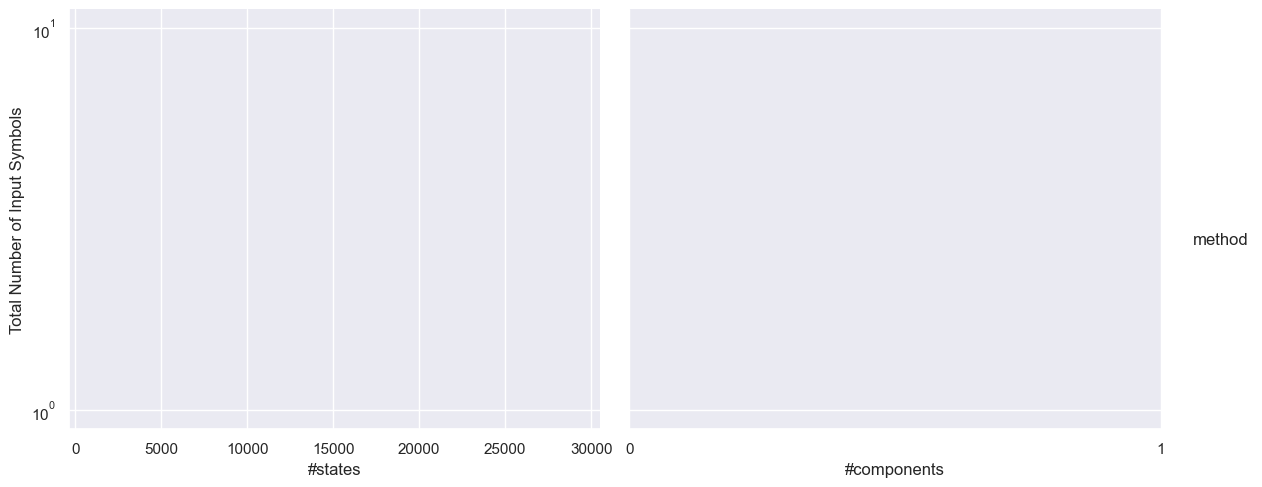

In [22]:
doForAllTests(
    plotSingleTypeData,
    False,
    "LSTAR_TOTAL_SYM",
    "CLSTAR_TOTAL_SYM",
    "Total Number of Input Symbols"
)


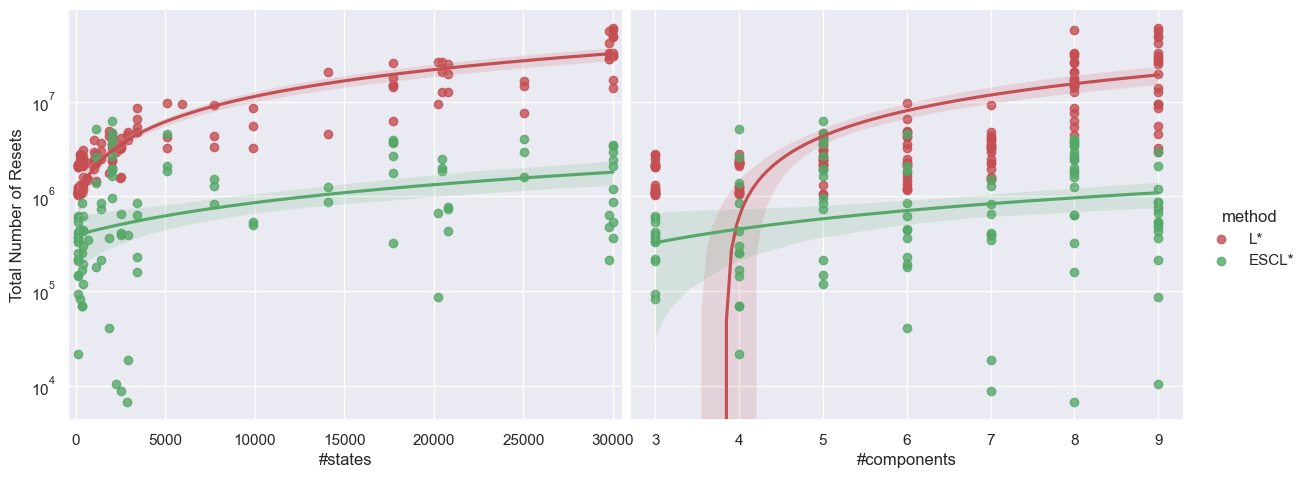

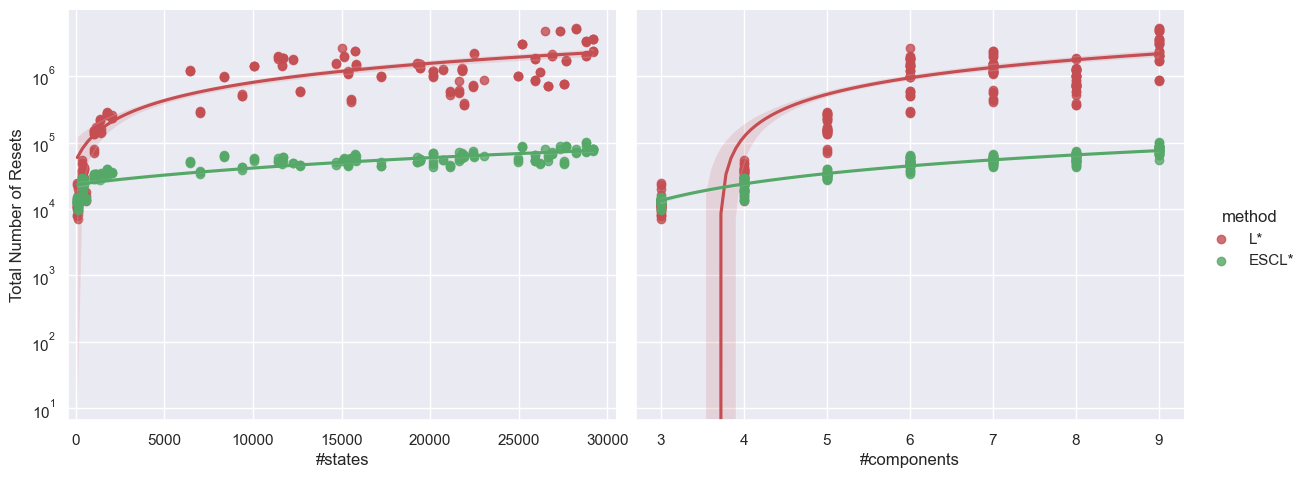

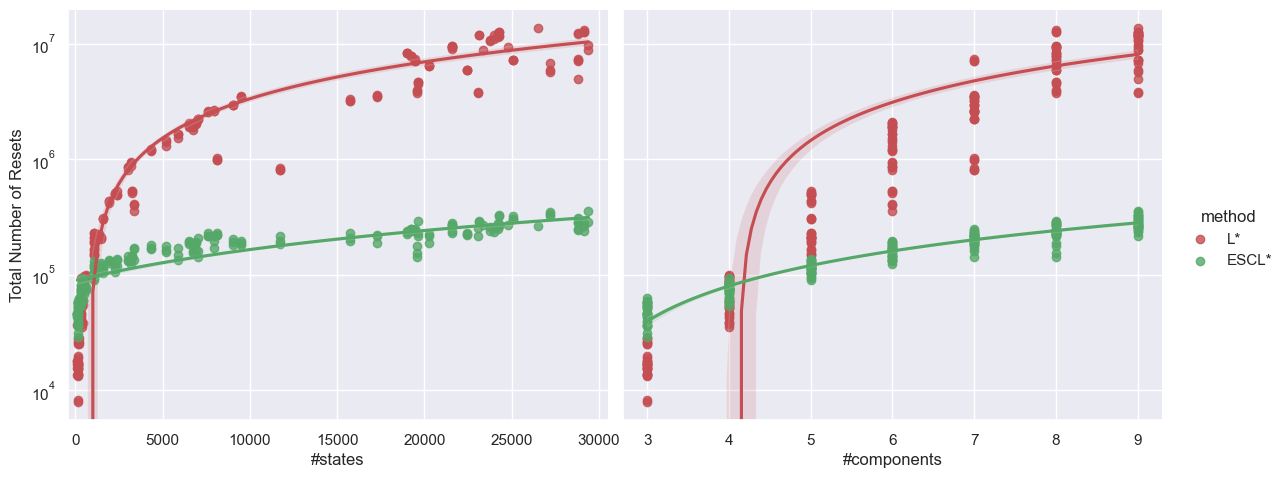

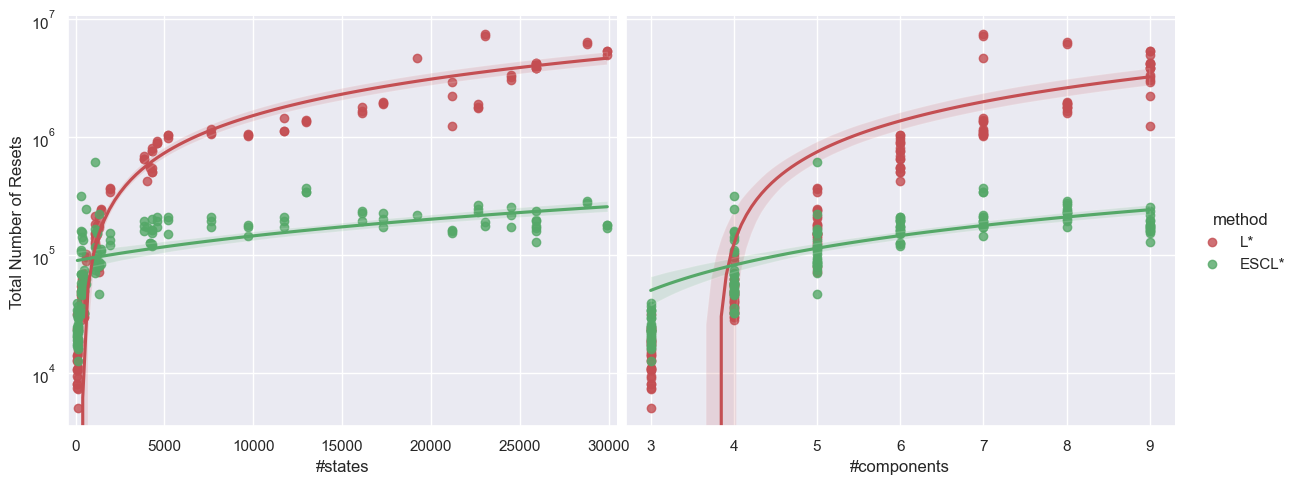

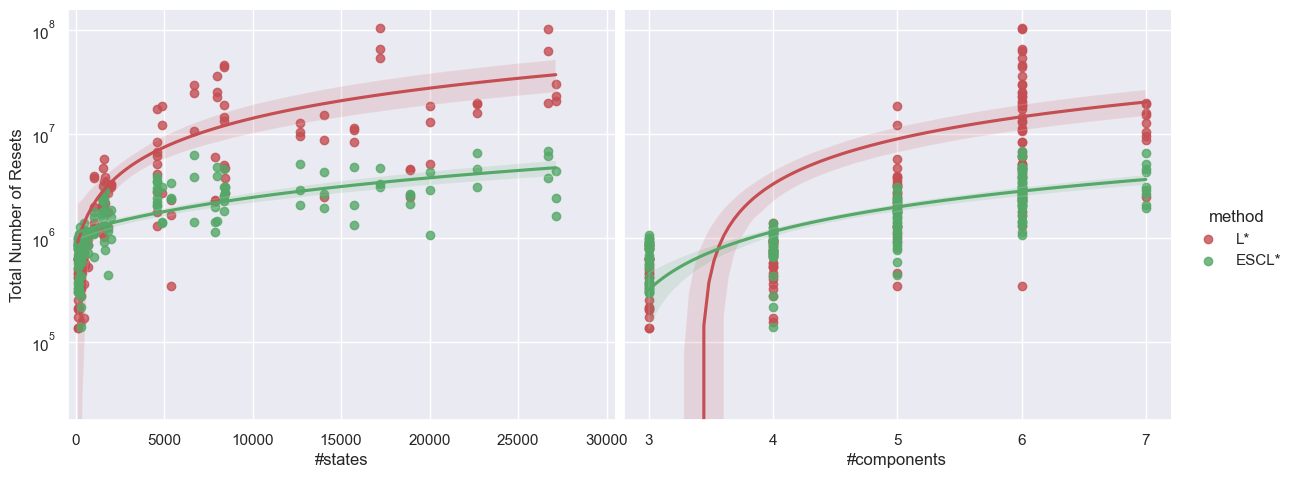

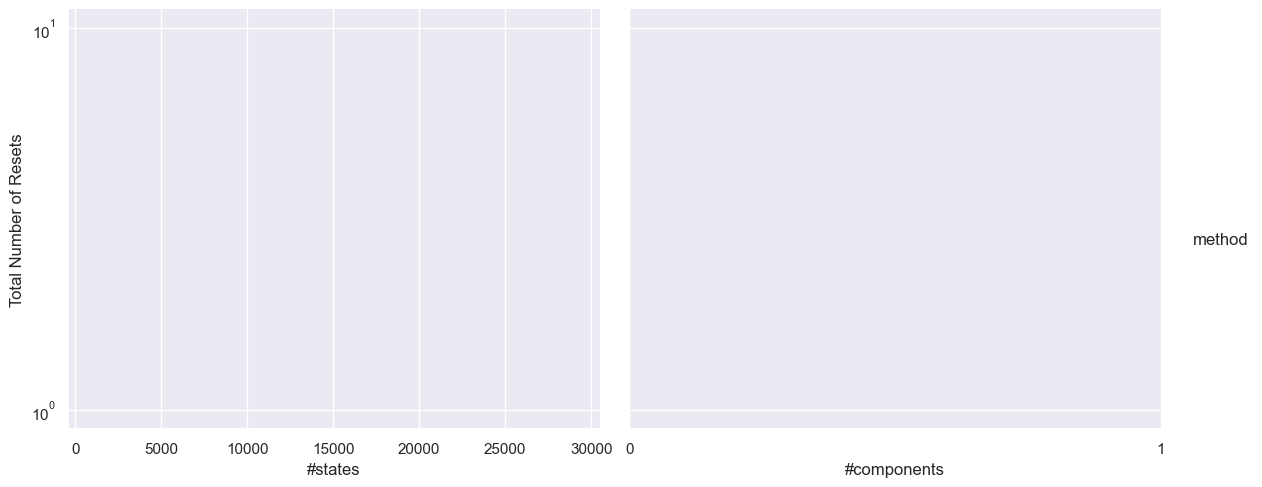

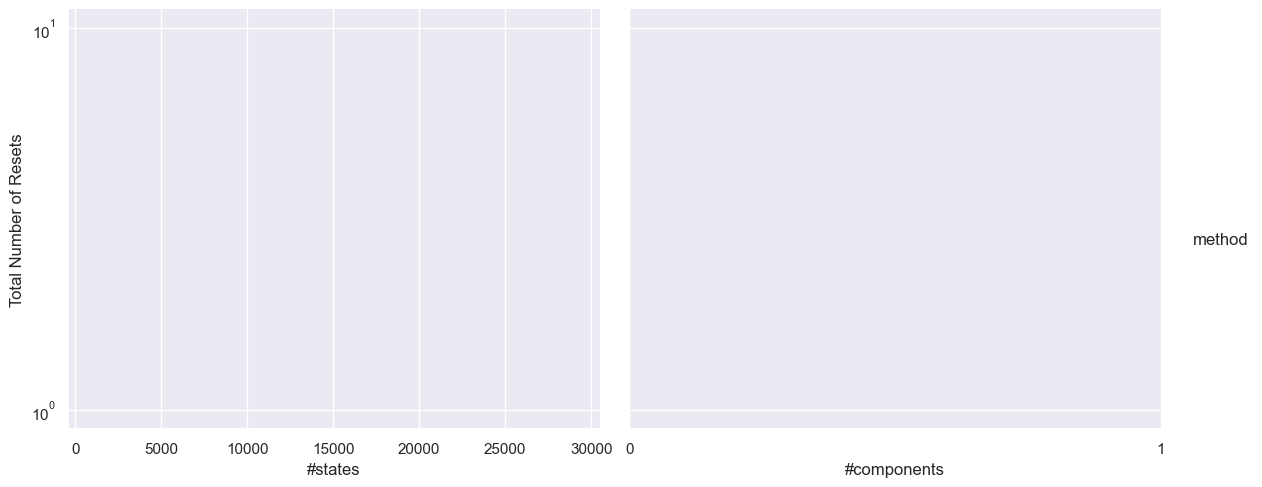

In [23]:
doForAllTests(plotSingleTypeData, False, "LSTAR_TOTAL_RST", "CLSTAR_TOTAL_RST", "Total Number of Resets")

In [24]:
# doForAllTests(plotSingleTypeData, False, "LSTAR_EQs", "CLSTAR_EQs", "Total Number Of Equivalence Queries")

In [25]:
# doForAllTests(plotSingleTypeData, False, "LSTAR_MQs", "CLSTAR_MQs", "Total Number of Membership Queries")

In [26]:
realTestsDf

,Unnamed: 0.15,Unnamed: 0.14,Unnamed: 0.13,Unnamed: 0.12,Unnamed: 0.11,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,...,CLSTAR_EQs,CLSTAR_COMPONENTS,CLSTAR_ROUNDS,CLSTAR_MQs,CACHE,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1
0,0,0,0,3,202,202,202,202,202,204,...,84,3,11,191386,True,195.0,NaN,NaN,NaN,NaN
1,1,1,1,6,196,196,196,196,196,198,...,201,3,16,127290,True,189.0,NaN,NaN,NaN,NaN
2,2,2,2,2,214,214,214,214,214,216,...,85,3,11,195617,True,207.0,NaN,NaN,NaN,NaN
3,3,3,3,5,210,210,210,210,210,212,...,84,3,11,167152,True,203.0,NaN,NaN,NaN,NaN
4,4,4,4,14,207,207,207,207,207,209,...,90,3,11,189160,True,200.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,142,142,142,142,5,5,5,5,5,5,...,431,9,22,48055,True,NaN,NaN,NaN,NaN,NaN
143,143,143,143,143,49,49,49,49,49,50,...,345,9,21,143602,True,41.0,41.0,41.0,41.0,41.0
144,144,144,144,145,226,226,226,226,226,76,...,355,9,21,29575,True,67.0,67.0,67.0,67.0,67.0
145,145,145,145,138,58,58,58,58,58,59,...,400,9,21,214690,True,50.0,50.0,50.0,50.0,50.0


In [27]:
# def plotMergedData(p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf, yCol, yLabel):
#     sns.set(style="whitegrid")  
    
#     fig, axes = plt.subplots(ncols=2)
    
#     markers = ["v", "o", "*", "d"]
#     colors = ["g", "b", "Orange", "r"]
#     labels = ["P2P", "Ring", "Star", "Mesh"]
    
#     testDfs = [p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf]
    
#     typeLegend = [plt.scatter([], [], marker=marker, color=color, label=label) for\
#         marker, color, label in zip(markers, colors, labels)]
#     methodLegend = [plt.Line2D([], [], color='Black', label='SCL*'),\
#         plt.Line2D([], [], color='Black', label='L*', linestyle='--')]
    
#     delta = int((maxNumOfStates - minNumOfStates + int(maxNumOfStates / 300)) / 60)
    
#     for ax, xCol, xLabel, xLim, yLim in zip(axes, ['STATES', 'CLSTAR_COMPONENTS'],\
#         ['States', 'Components'], [[minNumOfStates - delta, maxNumOfStates + delta], [2.9, 9.1]], [400000 if 'SYM' in yCol else 1000] * 2):
#         for df, marker, color in zip(testDfs, markers, colors):
#             sns.regplot(data=df, x=xCol, y=yCol, marker=marker, color=color,
#                         ax=ax, line_kws={'linestyle': '--'})
#             sns.regplot(data=df, x=xCol, y=yCol.replace('LSTAR', 'CLSTAR'), marker=marker, color=color,
#                         ax=ax)

#         ax.set_xlabel(xLabel)
#         ax.set_xlim(xLim)
#         ax.set_ylim(bottom=yLim)
#         ax.set_yscale('log')
#         ax.set_facecolor("#e4e6eb")
#         ax.set_axisbelow(True)
#         ax.yaxis.grid(color='white')
#         ax.xaxis.grid(color='white')
        
#         type_legend = ax.legend(handles=typeLegend, loc='upper left')
#         method_legend = ax.legend(handles=methodLegend, loc='upper right')
#         ax.add_artist(type_legend)

#     axes[0].set_ylabel(yLabel)
#     axes[1].set_ylabel('')
  
#     plt.tight_layout() 
#     plt.show()

#     if yLabel == 'Total Number Of Symbols':
#         fig.savefig(
#         "Results/Plots/Merged-Symbols.pdf",
#         bbox_inches="tight"
#     )
#     else:
#         fig.savefig(
#         "Results/Plots/Merged-Resets.pdf",
#         bbox_inches="tight"
#     )



In [28]:
def plotMergedData(
    p2pDf,
    ringDf,
    starDf,
    meshDf,
    yCol,
    yLabel,
    *,
    p2pDf2=None,
    ringDf2=None,
    starDf2=None,
    meshDf2=None,
    method_labels=("L*", "ESCL*")
):
    sns.set(style="whitegrid")

    fig, axes = plt.subplots(ncols=2)

    markers = ["v", "o", "*", "d"]
    colors = ["g", "b", "Orange", "r"]
    labels = ["P2P", "Ring", "Star", "Mesh"]

    dfs1 = [p2pDf, ringDf, starDf, meshDf]
    dfs2 = [p2pDf2, ringDf2, starDf2, meshDf2]

    typeLegend = [
        plt.scatter([], [], marker=m, color=c, label=l)
        for m, c, l in zip(markers, colors, labels)
    ]

    methodLegend = [
        plt.Line2D([], [], color='Black', label=method_labels[1]),
        plt.Line2D([], [], color='Black', label=method_labels[0], linestyle='--')
    ]

    delta = int((maxNumOfStates - minNumOfStates + int(maxNumOfStates / 300)) / 60)

    for ax, xCol, xLabel, xLim, yLim in zip(
        axes,
        ['STATES', 'CLSTAR_COMPONENTS'],
        ['States', 'Components'],
        [[minNumOfStates - delta, maxNumOfStates + delta], [2.9, 9.1]],
        [400000 if 'SYM' in yCol else 1000] * 2
    ):
        for df1, df2, marker, color in zip(dfs1, dfs2, markers, colors):

            # ---------- Method 1 (dashed) ----------
            sns.regplot(
                data=df1,
                x=xCol,
                y=yCol,
                marker=marker,
                color=color,
                ax=ax,
                line_kws={'linestyle': '--'}
            )

            # ---------- Method 2 (solid) ----------
            if df2 is None:
                # OLD MODE: same dataframe, other column
                y2 = yCol.replace('LSTAR', 'CLSTAR')
                sns.regplot(
                    data=df1,
                    x=xCol,
                    y=y2,
                    marker=marker,
                    color=color,
                    ax=ax
                )
            else:
                # NEW MODE: different dataframe, same column
                sns.regplot(
                    data=df2,
                    x=xCol,
                    y=yCol,
                    marker=marker,
                    color=color,
                    ax=ax
                )

        ax.set_xlabel(xLabel)
        ax.set_xlim(xLim)
        ax.set_ylim(bottom=yLim)
        ax.set_yscale('log')
        ax.set_facecolor("#e4e6eb")
        ax.set_axisbelow(True)
        ax.yaxis.grid(color='white')
        ax.xaxis.grid(color='white')

        type_legend = ax.legend(handles=typeLegend, loc='upper left')
        method_legend = ax.legend(handles=methodLegend, loc='upper right')
        ax.add_artist(type_legend)

    axes[0].set_ylabel(yLabel)
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

    if yLabel == 'Total Number Of Symbols':
        fig.savefig("Results/Plots/Merged-Symbols.pdf", bbox_inches="tight")
    else:
        fig.savefig("Results/Plots/Merged-Resets.pdf", bbox_inches="tight")


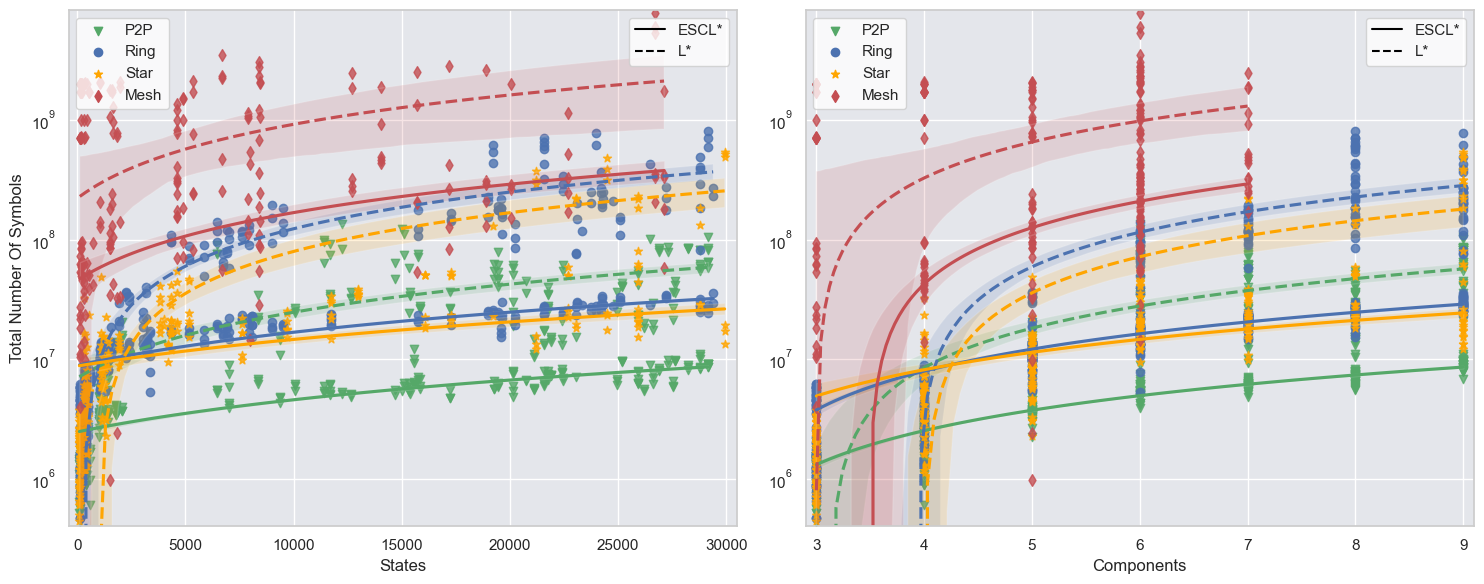

In [ ]:
# plotMergedData(p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf, "LSTAR_TOTAL_SYM", "Total Number Of Symbols")

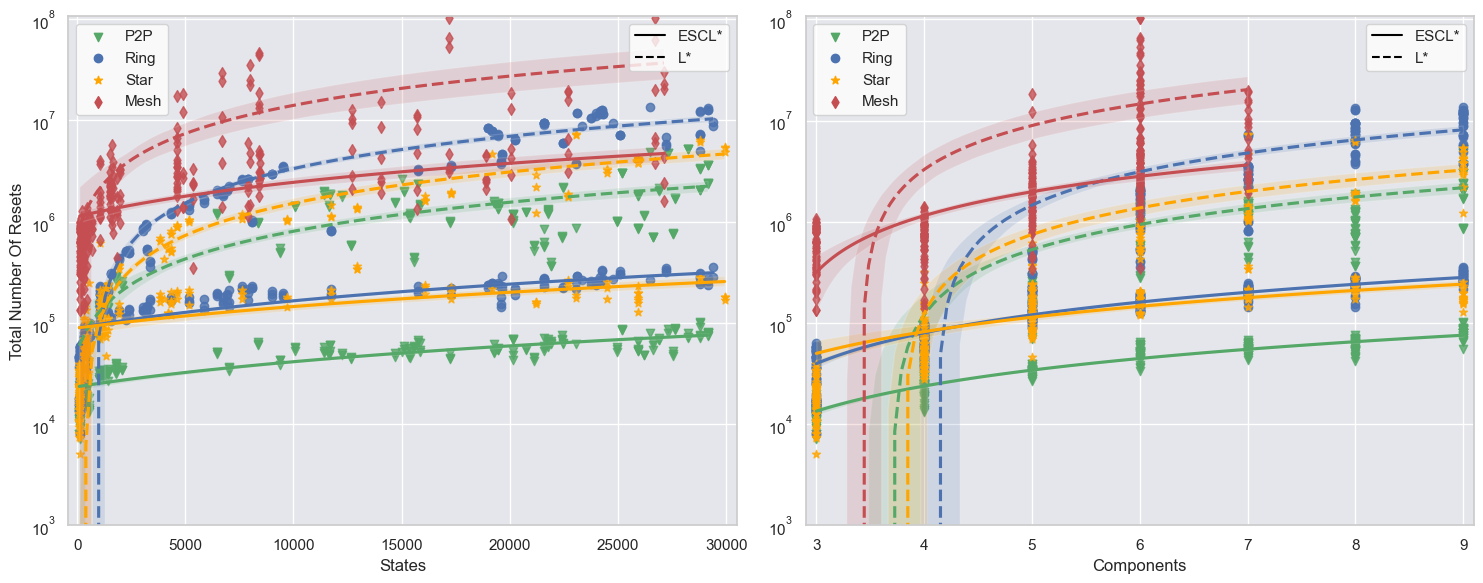

In [30]:
# plotMergedData(p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf, "LSTAR_TOTAL_RST", "Total Number Of Resets")

In [31]:
variables = [
    "CLSTAR_TOTAL_SYM",
    "CLSTAR_TOTAL_RST",
]

stats = ["Mean"]

titles = {
    "CLSTAR_TOTAL_SYM" : "Symbols",
    "CLSTAR_TOTAL_RST": "Resets",
    "Mean" : "AVG"
}

datasets = {
    "Real":   (oldRealTestsDf,  realTestsDf),
    "P2P":    (oldP2pTestsDf,   p2pTestsDf),
    "Ring":   (oldRingTestsDf,  ringTestsDf),
    "Star":   (oldStarTestsDf,  starTestsDf),
    "Mesh":   (oldMeshTestsDf,  meshTestsDf),
}


In [32]:
def build_summary(old_df, new_df):
    rows = []
    for var in variables:
        for stat in stats:
            rows.append([
                titles[var],
                titles[stat],
                getattr(old_df[var], stat.lower())().round().astype(int),
                getattr(new_df[var], stat.lower())().round().astype(int),
            ])

    return rows

In [33]:
def plotElegantTables(datasets):
    n = len(datasets)
    fig, axes = plt.subplots(
        nrows=n,
        figsize=(7, 1.5 * n),
        gridspec_kw={"hspace": 0.9}
    )

    if n == 1:
        axes = [axes]

    for ax, (name, (old_df, new_df)) in zip(axes, datasets.items()):
        ax.axis("off")

        data = build_summary(old_df, new_df)

        table = ax.table(
            cellText=data,
            colLabels=["Metric", "Stat", "Old", "New"],
            cellLoc="center",
            loc="center"
        )

        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.3)

        # --- Typography & styling ---
        for (row, col), cell in table.get_celld().items():
            cell.set_facecolor("white")
            cell.set_edgecolor("white")
            cell.set_linewidth(0)

            # Header row
            if row == 0:
                cell.set_text_props(weight="bold")
                cell.visible_edges = "B"
                cell.set_linewidth(0.8)
                cell.set_edgecolor("black")

            # Bottom rule
            if row == len(data):
                cell.visible_edges = "B"
                cell.set_linewidth(0.8)
                cell.set_edgecolor("black")

        # Section title
        ax.text(
            0.5, 1.25,
            name,
            ha="center",
            va="bottom",
            fontsize=12,
            fontweight="bold",
            transform=ax.transAxes
        )

    plt.tight_layout()
    fig.savefig(
        "Results/Plots/CLSTAR-Stats-Tables.pdf",
        bbox_inches="tight"
    )
    plt.show()


In [34]:
old_all = pd.concat([ oldRealTestsDf, oldP2pTestsDf, oldRingTestsDf, oldStarTestsDf, oldMeshTestsDf ]) 
new_all = pd.concat([ realTestsDf, p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf ])

allDatasets = {
    "All":   (old_all,  new_all)
}

# plotElegantTables(allDatasets)

In [35]:
def save_summary_csv(datasets, path):
    rows = []

    for topology, (old_df, new_df) in datasets.items():
        for var in variables:
            for stat in stats:
                rows.append({
                    "Topology": topology,
                    "Metric": titles[var],
                    "Stat": titles[stat],
                    "Old": round(getattr(old_df[var], stat.lower())(), 2),
                    "New": round(getattr(new_df[var], stat.lower())(), 2),
                })

    pd.DataFrame(rows).to_csv(path, index=False)


In [36]:

save_summary_csv(
    allDatasets,
    "Results/stats.csv"
)


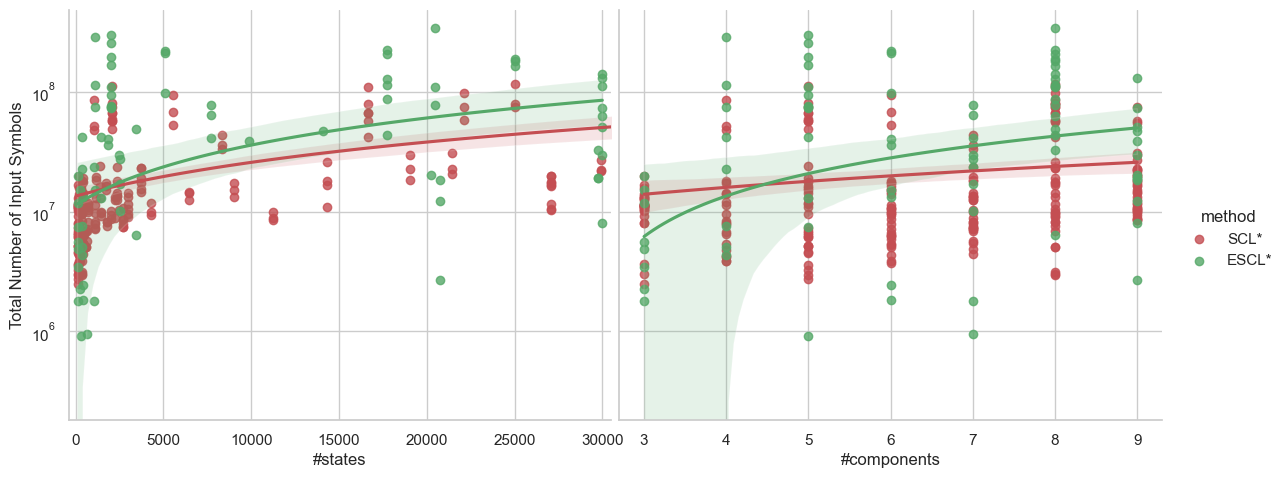

In [37]:
plotSingleTypeData(
        data=oldRealTestsDf,
        data2=realTestsDf,
        testType="Real",
        yCol1="CLSTAR_TOTAL_SYM",
        yCol2="CLSTAR_TOTAL_SYM_NEW",
        yLabel="Total Number of Input Symbols",
        method_names=("SCL*", "ESCL*")
    )

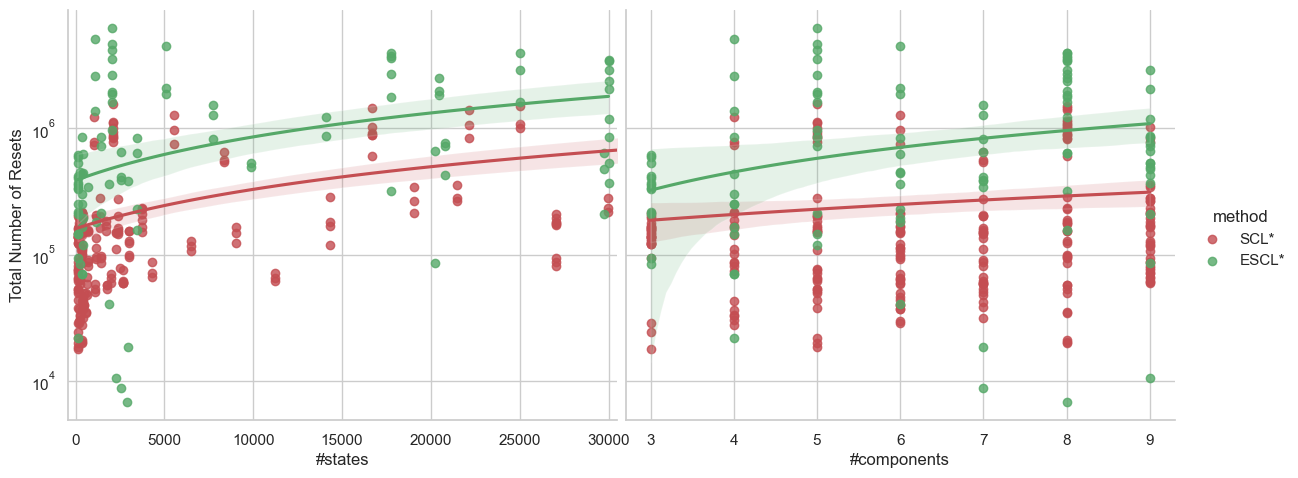

In [38]:
plotSingleTypeData(
        data=oldRealTestsDf,
        data2=realTestsDf,
        testType="Real",
        yCol1="CLSTAR_TOTAL_RST",
        yCol2="CLSTAR_TOTAL_RST_NEW",
        yLabel="Total Number of Resets",
        method_names=("SCL*", "ESCL*")
    )

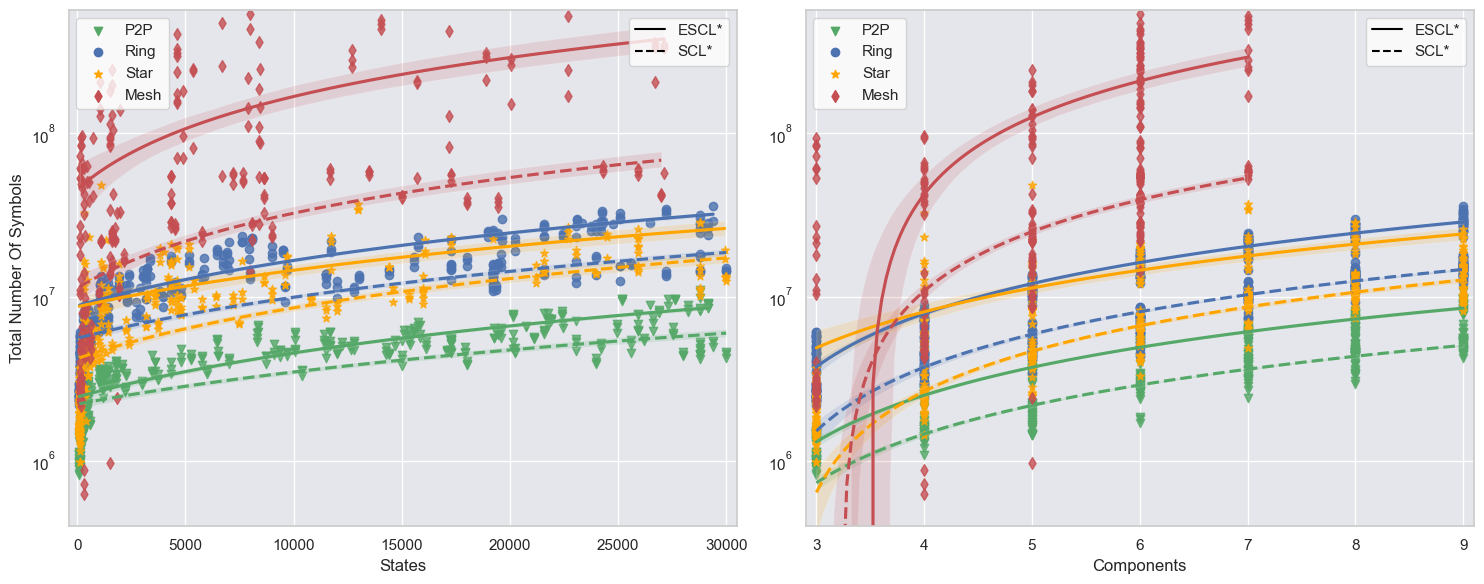

In [39]:
plotMergedData(
    oldP2pTestsDf,
    oldRingTestsDf,
    oldStarTestsDf,
    oldMeshTestsDf,
    "CLSTAR_TOTAL_SYM",
    "Total Number Of Symbols",
    p2pDf2=p2pTestsDf,
    ringDf2=ringTestsDf,
    starDf2=starTestsDf,
    meshDf2=meshTestsDf,
    method_labels=("SCL*", "ESCL*")
)


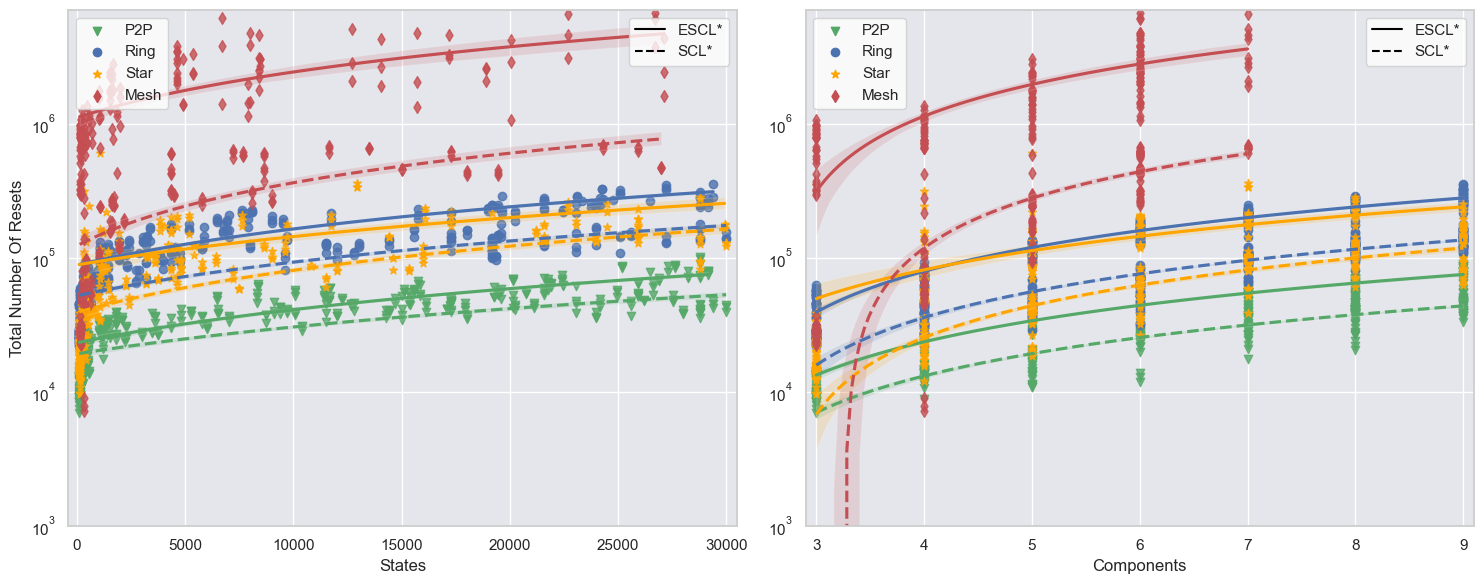

In [40]:
plotMergedData(
    oldP2pTestsDf,
    oldRingTestsDf,
    oldStarTestsDf,
    oldMeshTestsDf,
    "CLSTAR_TOTAL_RST",
    "Total Number Of Resets",
    p2pDf2=p2pTestsDf,
    ringDf2=ringTestsDf,
    starDf2=starTestsDf,
    meshDf2=meshTestsDf,
    method_labels=("SCL*", "ESCL*")
)
